In [ ]:
import cv2
import numpy as np
import imutils
import glob

import os
import glob
import pickle
import keras
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

###https://nbviewer.org/github/banderlog/daugman/blob/master/example.ipynb

In [ ]:
!git clone https://github.com/banderlog/daugman.git
%cd daugman

Cloning into 'daugman'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 66 (delta 0), reused 1 (delta 0), pack-reused 59
Unpacking objects: 100% (66/66), done.
/content/daugman


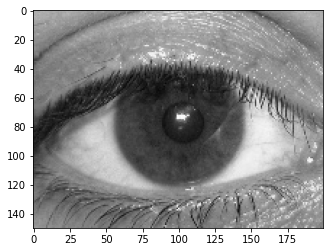

In [ ]:
# Test images are obtained on https://www.pexels.com/
im = cv2.imread("/content/drive/MyDrive/image processing/UBIRIS_800_600/new_Sessao1/final_image.2.6.jpg")[..., ::-1]
gray_img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

_ = plt.imshow(gray_img, cmap='gray')



In [ ]:
from daugman import find_iris

In [ ]:
# minimal iris radius -- 10px
# maximal iris radius -- 30px
answer = find_iris(gray_img, daugman_start=20, daugman_end=60, daugman_step=10, points_step=3)
print(answer)

iris_center, iris_rad = answer


# plot result
out = im.copy()
cv2.circle(out, iris_center, iris_rad, (0, 0, 255), 1)
_ = plt.imshow(out[::,::,::-1])

Your image is not a square!
((98, 77), 40)


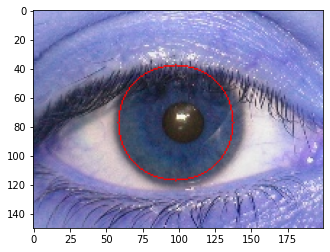

In [ ]:
# plot result
out = im.copy()
cv2.circle(out, iris_center, iris_rad, (0, 0, 255), 1)
_ = plt.imshow(out[::,::,::-1])

###Eyes Detection

###https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

###https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html

In [ ]:
imgs = []

final_output = []

eyes_detection=[]
iris_eyes_detection=[]


In [ ]:
pp='final_image.1.2.jpg'
pp.split('.')

['final_image', '1', '2', 'jpg']

In [ ]:
lable=pp.split('.')[1]

In [ ]:
lable

'1'

In [ ]:
for filefilepath in glob.iglob('/content/drive/MyDrive/image processing/UBIRIS_800_600/new_Sessao1/*'):
    
    
    if filefilepath[-1] == 'g':
        
        img	= cv2.imread(filefilepath)
        img=cv2.resize(img,(400,300))
        img=cv2.cvtColor(img,	cv2.COLOR_BGR2RGB)

        #imgs_colored=cv2.imread(filefilepath)
        gray=cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY)

        #img=cv2.resize(img,(200,150))
        #imgs_colored.append(img)

        # print(filefilepath)
        #print(filefilepath[19:-6])
        #print(filefilepath[-5])
        split = filefilepath.split(".")
        #print(split)
        # print(split[0][20:])
        # print(split[1])

        label=split[1]
        example_number = split[2]
        imgs.append([gray,int(label),example_number,img])
        #final_output_84_84.append(imgs_colored)
        # lables.append(int(label))
    

In [ ]:
imgs[0]

[array([[178, 177, 176, ..., 149, 145, 143],
        [175, 175, 174, ..., 147, 144, 142],
        [170, 170, 169, ..., 144, 141, 140],
        ...,
        [128, 129, 133, ..., 166, 158, 154],
        [127, 129, 133, ..., 171, 162, 157],
        [127, 129, 133, ..., 173, 164, 159]], dtype=uint8),
 175,
 '877',
 array([[[232, 175, 164],
         [231, 174, 163],
         [229, 172, 162],
         ...,
         [214, 144, 134],
         [210, 140, 130],
         [208, 138, 128]],
 
        [[229, 172, 161],
         [228, 171, 161],
         [227, 170, 160],
         ...,
         [212, 142, 132],
         [209, 139, 128],
         [207, 137, 127]],
 
        [[224, 167, 156],
         [223, 166, 156],
         [222, 165, 156],
         ...,
         [209, 139, 128],
         [206, 136, 125],
         [205, 135, 124]],
 
        ...,
 
        [[193, 127, 105],
         [194, 128, 107],
         [198, 131, 111],
         ...,
         [220, 159, 160],
         [213, 151, 151],
         [

In [ ]:
len(imgs)

1876

In [ ]:
imgs[10][0].shape

(300, 400)

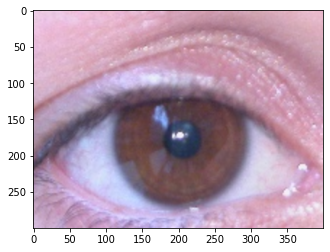

In [ ]:
plt.imshow(imgs[661][3])

###https://learnopencv.com/edge-detection-using-opencv/

Your image is not a square!


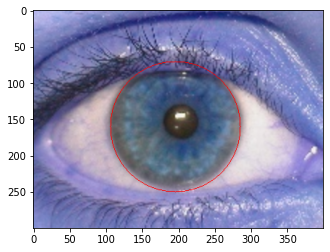

In [ ]:
imggray=imgs[163][0].copy()
imgcolor=imgs[163][3].copy()
# minimal iris radius -- 10px
# maximal iris radius -- 30px
answer = find_iris(imggray, daugman_start=30, daugman_end=110, daugman_step=10, points_step=3)


iris_center, iris_rad = answer


# plot result
out = imgcolor.copy()
cv2.circle(out, iris_center, iris_rad, (0, 0, 255), 1)
_ = plt.imshow(out[::,::,::-1])


In [ ]:
iris_center

(196, 160)

In [ ]:
x=iris_center[0]
y=iris_center[1]
r=iris_rad

In [ ]:
answer[0][0]

196

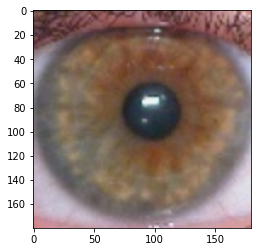

In [ ]:
# rectX = (x - r) 
# rectY = (y - r)
crop_img = imgcolor[ y-r:y+r,x-r:x+r]
plt.imshow(crop_img)

In [ ]:
circle=answer

In [ ]:
x=circle[0][0]
y=circle[0][1]
r=circle[1]
print(x, y,r)

196 160 90


###eyes detection

####https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php

###iris detection

In [ ]:
directory = r'/content/drive/MyDrive/image processing/UBIRIS_800_600/finalirisdataset2'
os.chdir(directory) 
os.listdir()

[]

In [ ]:
iris_num=0
circles=[]
crop_imgs =[]
iris_eyes_detection=[]

for g,l,n,c in  imgs:
  circles= find_iris(g, daugman_start=30, daugman_end=110, daugman_step=10, points_step=3)
  if circle is not None :
    x=circle[0][0]
    y=circle[0][1]
    r=circle[1]
    croped=c[max(0,y-r):max(0,y+r),max(0,x-r):max(0,x+r)]
    crop_imgs.append(croped)
    cv2.imwrite(str(l)+'.'+str(n)+'.jpg',croped)
    iris_eyes_detection.append(imgs[iris_num])
    iris_num = iris_num+1






     

        

Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a square!
Your image is not a 

In [ ]:
iris_num

In [ ]:
plt.imshow(crop_imgs[110])
 

In [ ]:
len(iris_eyes_detection)

In [ ]:
plt.imshow(crop_imgs[12])
